# 2. Extracción de características

En esta sección vamos a presentar las características que podemos extraer tanto del dominio temporal como del dominio frecuencial de un audio. En base a estas características daremos una intuición de cómo se pueden distinguir géneros musicales a nivel exploratorio/cualitativo, antes de proceder a la próxima sección donde utilizaremos modelos de aprendizaje.

## Importaciones

In [4]:
import librosa

import numpy as np

import matplotlib.pyplot as plt

import IPython.display as ipd
import pandas as pd
import os

___

## 2.1. Explicación de las características

Cuando analizamos una señal de audio, podemos hacerlo desde dos perspectivas principales: el dominio temporal y el dominio frecuencial. Cada uno de estos dominios nos brinda diferentes tipos de información sobre el audio.

### Análisis de una señal de audio: dominio temporal, dominio frecuencial y dominio tempofrecuencial

Hagamos un breve repaso sobre los distintos dominios en los que podemos analizar una señal.

**Dominio temporal: tiempo vs amplitud**

Cuando analizamos el dominio temporal de una señal estamos analizando cómo varía la amplitud de la señal de audio a lo largo del tiempo ("la intensidad de la señal en cada momento"). En este caso:
* **Eje X - tiempo**. El eje horizontal representa el avance temporal medido en segundos.
* **Eje Y - amplitud**. El eje vertical representa la amplitud de la señal, es decir, la desviación de la onda con respecto al eje central. En el dominio temporal se mide como un valor sin dimensiones (adimensional) que oscila entre -1 y 1 en formatos normalizados o como una señal de número entero (por ejemplo, entre -32768 y 32767 señales para 16-bit) en formatos no normalizados. Representa la fuerza o intensidad de la señal.

**Dominio frecuencial: frecuencia vs magnitud**

Cuando analizamos el dominio frecuencial de una señal, estamos analizando la magnitud de cada frencuencia de la señal. En este caso:

* **Eje X - frecuencia.** El eje horizontal representa las frecuencias presentes en la señal, medidas en Hertz (Hz). 
* **Eje Y - magnitud/amplitud.** El eje vertical representa la magnitud de cada frecuencia. Es el módulo del número complejo que representa la contribución de cada frecuencia a la señal global.

Este gráfico representa de forma clara la dicotomía entre ambos dominios.

<img src="img/NB2_timeFreqDomain.png" width="600"/>

*Figura: Dominio temporal vs dominio frecuencial. Fuente: [[1]](https://studyelectrical.com/2023/05/time-domain-analysis-vs-frequency-domain-analysis.html)*

Veamos a continuación un ejemplo práctico utilizando un audio de ejemplo del corpus CCMUSIC:

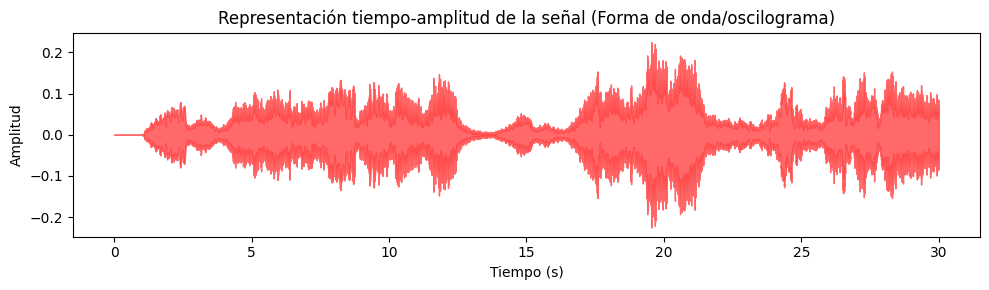

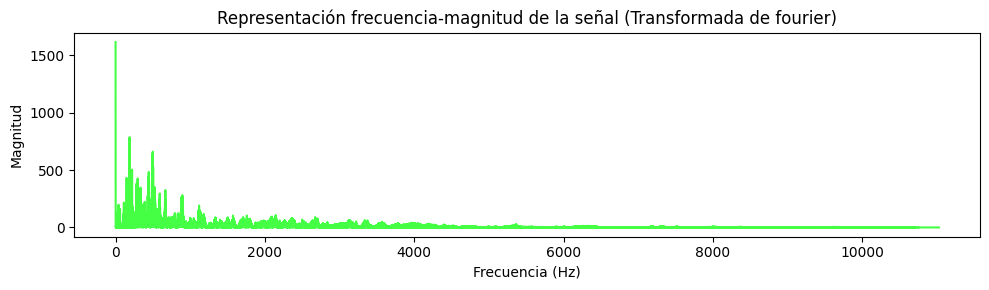

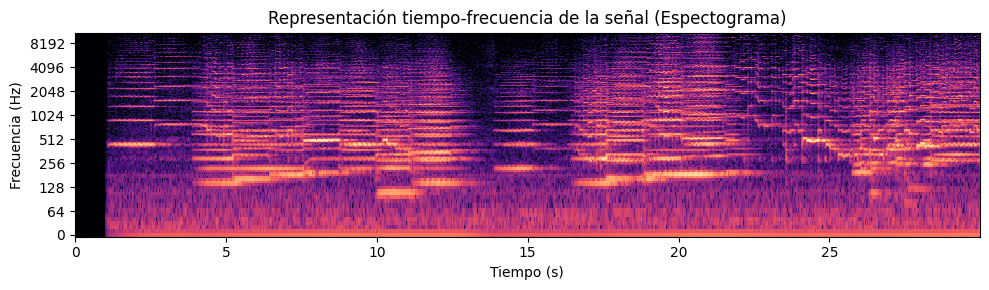

In [17]:
file_ejemplo = "ccmusic/train/audios/audio_train_653.wav"
audio, sr = librosa.load(file_ejemplo, sr=None, mono=True)

# Reproducir el audio
ipd.display(ipd.Audio(audio, rate=sr))

# Dominio temporal
plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio, sr=sr, color="#f44", alpha=0.8)
plt.title("Representación tiempo-amplitud de la señal (Forma de onda/oscilograma)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

# Dominio frecuencial
fft = np.fft.fft(audio)
frequencies = np.fft.fftfreq(len(fft), 1/sr) # *** Explicación abajo ***
magnitude = np.abs(fft)

plt.figure(figsize=(10, 3))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(frequencies)//2], color="#4f4") # Representamos solo la mitad dado que el gráfico es simétrico
plt.title("Representación frecuencia-magnitud de la señal (Transformada de fourier)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.tight_layout()
plt.show()

# Frecuencia + tipo
D = np.abs(librosa.stft(audio))
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title("Representación tiempo-frecuencia de la señal (Espectograma)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.tight_layout()
plt.show()

# *** Explicación ***
# np.fft.fftfreq genera un array de frecuencias que corresponde a los componentes de la transformada de Fourier.
# El primer argumento es la longitud de la transformada (igual a la longitud de la señal original).
# El segundo argumento, 1/sr, es el intervalo de tiempo entre muestras, que es el inverso de la tasa de muestreo (sr).
# Esto produce un array de frecuencias que se corresponde con los índices del resultado de np.fft.fft, permitiendo
# visualizar el espectro de frecuencias en Hertz.# 

### Segmentación en bloques

### Características del dominio temporal

* **Amplitude Envelope (AE)**:
    - La envolvente de una señal proporciona una representación más suave de su amplitud, lo que nos permite visualizar mejor cómo varía la intensidad de la señal a lo largo del tiempo.

    - Intuitivamente, es como representar el borde del oscilograma.

    - Matemáticamente, se calcula agrupando el oscilograma en $K$ bloques temporales. Para cada bloque temporal o *frame*, en lugar de tomar todos los valores de amplitud, se toma el máximo (dando esa impresión de borde en la representación final).  
    Esto queda representado por la siguiente fórmula, donde \(AE_k\) es la envolvente de amplitud del bloque \(k\), $F$ es el tamaño del bloque, y \(s(i)\) es la señal en el índice \(i\).
    $$AE_k = \max_{i=kF}^{(k+1)F - 1} s(i)$$

In [18]:
# def amplitude_envelope(signal,frame_size=1024,hop_length=512):
#     F=frame_size
#     H=hop_length
#     N=signal.shape[0]
#     return np.array([max(signal[k:k+F]) for k in range(0, N, H)])

### Características del dominio frecuencial

* **Band Energy Ratio (BER)**:
    - El BER mide la energía de la señal en diferentes bandas de frecuencia.
    - Es útil para distinguir entre sonidos graves y agudos.

* **Spectral Centroid**:
    - El *Spectral Centroid* indica el "centro de masa" del espectro de frecuencia.
    - Es un indicador de qué tan "brillante" o "oscuro" es el sonido.

* **Spectral Bandwidth**:
    - El *Spectral Bandwidth* mide la dispersión de las frecuencias.
    - Es útil para distinguir entre sonidos con diferentes texturas.

____

## 2.2. Caso práctico: las características distinguen géneros muscicales

____

## 2.3. Extracción de características para el dataset CCMUSIC

En la actualidad es muy común el uso de espectogramas junto con redes convolucionales CNN para realizar clasificación de audio. No obstante, tradicionalmente, para entrenar modelos clásicos de Machine Learning se utilizaba extracción de características.

Al igual que en el caso del análisis de textos se utilizada el TfIdf junto con SVM ("bag of words"), en el análisis de audio se identificaba cada audio con una serie de características y se construía un dataset tabular (de ahí que hayamos titulado este proyecto "bag of songs").

En esta sección, vamos a extraer las características anteriores para cada audio y vamos a construir un dataset tabular que nos permita clasificar utilizando modelos clásicos y datos tabulares.

____

In [6]:
# Funciones de extracción de características
def amplitude_envelope(signal, frame_size=1024, hop_length=512):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

def calculate_ber(signal, split_freq, sample_rate, frame_size=1024, hop_length=512):
    spec = librosa.stft(signal, n_fft=frame_size, hop_length=hop_length)
    freq_per_bin = sample_rate / 2 / spec.shape[0]
    split_bin = int(split_freq / freq_per_bin)
    spec_magnitude = np.abs(spec).T

    ber = []
    for freqs in spec_magnitude:
        low_energy = np.sum(freqs[:split_bin]**2)
        high_energy = np.sum(freqs[split_bin:]**2)
        ber.append(low_energy / high_energy if high_energy != 0 else 0)
    return np.array(ber)

# Carga de datos de anotaciones
df = pd.read_csv('ccmusic2/validation/annotations.csv')
features = []

# Análisis de todos los archivos de audio
audio_files = os.listdir('ccmusic2/validation/audios/')
for file_name in audio_files:
    audio_path = f'ccmusic2/validation/audios/{file_name}'
    audio_data, sr = librosa.load(audio_path, sr=None)
    label = df[df['audio_file'] == int(file_name.split('.')[0])]['label_name'].values[0]

    # Extracción de características
    envelope = amplitude_envelope(audio_data)
    rms = librosa.feature.rms(y=audio_data)
    zcr = librosa.feature.zero_crossing_rate(audio_data)
    ber = calculate_ber(audio_data, 500, sr)
    spec_cent = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)

    features.append({
        "file": file_name,
        "label": label,
        "rms": np.mean(rms),
        "zcr": np.mean(zcr),
        "ber": np.mean(ber),
        "spec_cent": np.mean(spec_cent),
        "spec_bw": np.mean(spec_bw),
        "chroma_stft": np.mean(chroma_stft),
        "rolloff": np.mean(rolloff),
        "mfcc": np.mean(mfcc)
    })


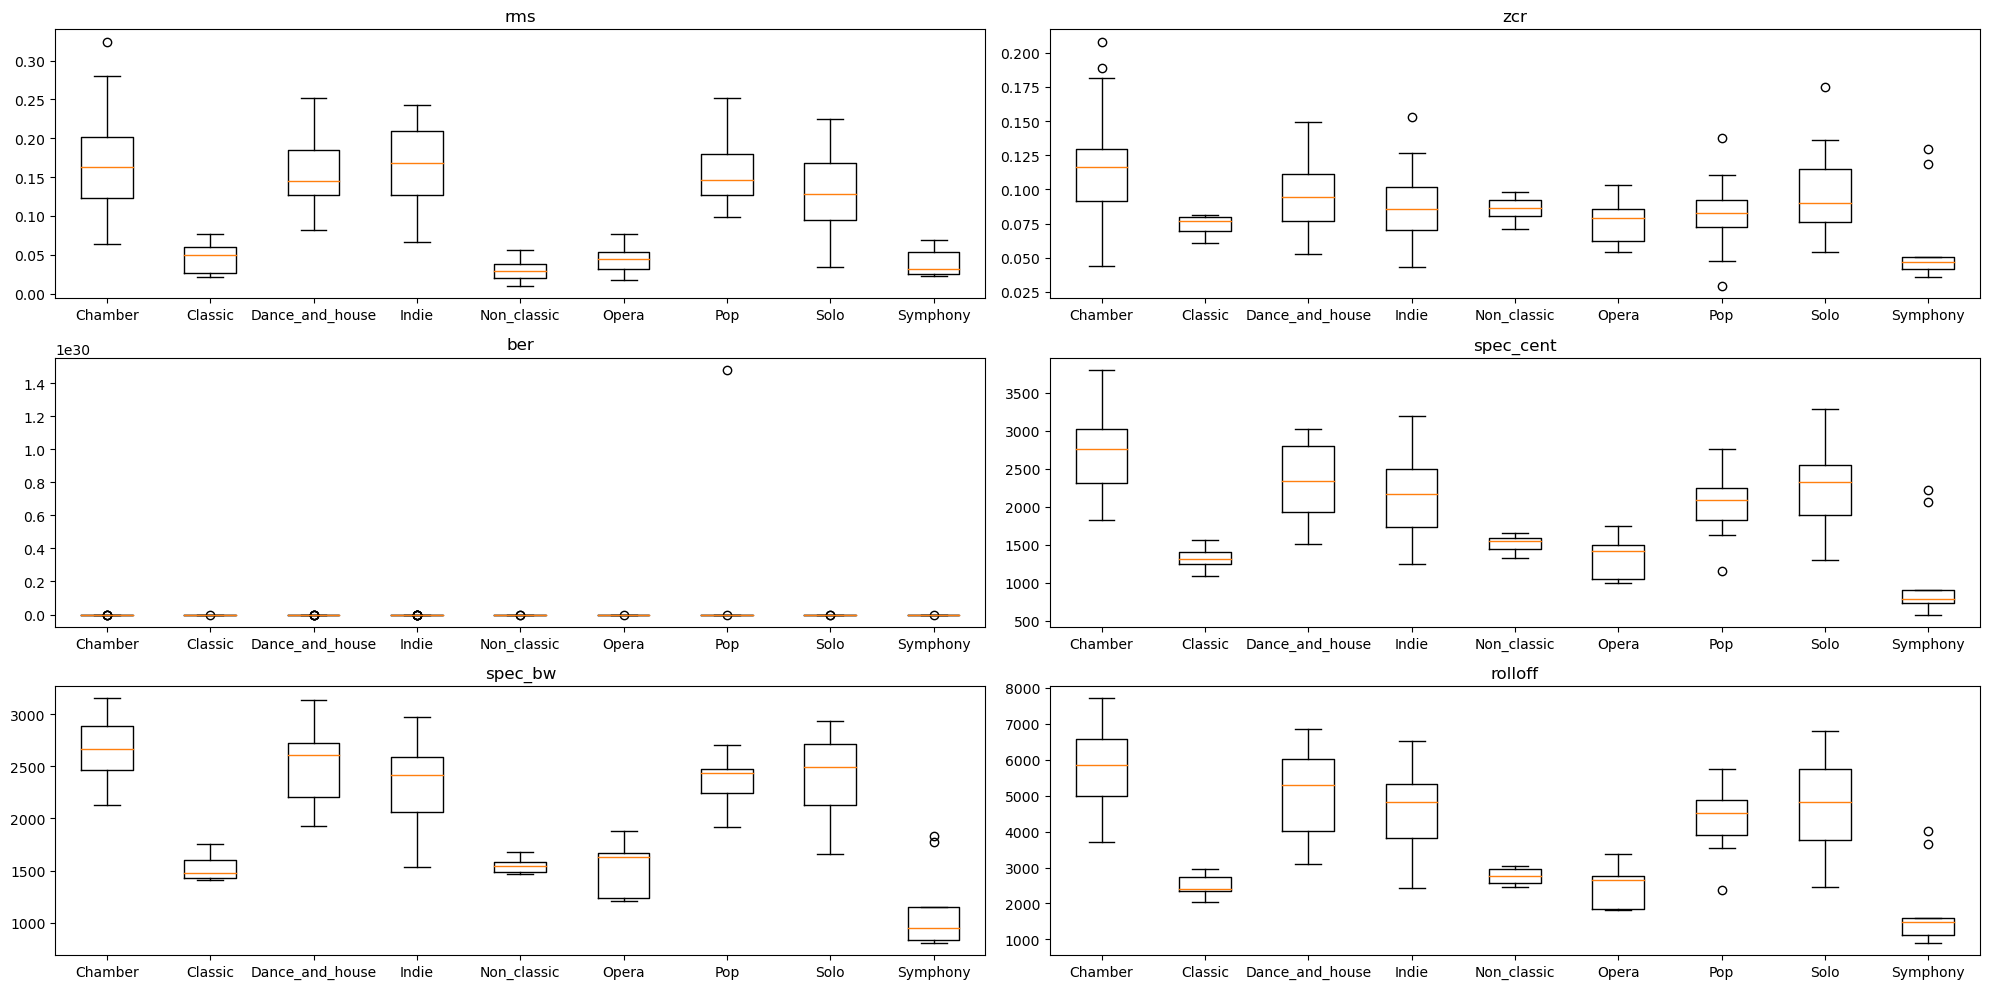

In [8]:
# Convertir a DataFrame para análisis posterior
features_df = pd.DataFrame(features)

# Gráficos de caja y bigote para todas las características
plt.figure(figsize=(20, 10))
for i, feature_name in enumerate(['rms', 'zcr', 'ber', 'spec_cent', 'spec_bw', 'rolloff'], 1):
    plt.subplot(3, 2, i)
    boxplot_data = [group[feature_name].values for name, group in features_df.groupby('label')]
    plt.boxplot(boxplot_data, labels=[name for name, _ in features_df.groupby('label')])
    plt.title(feature_name)
plt.tight_layout()
plt.show()

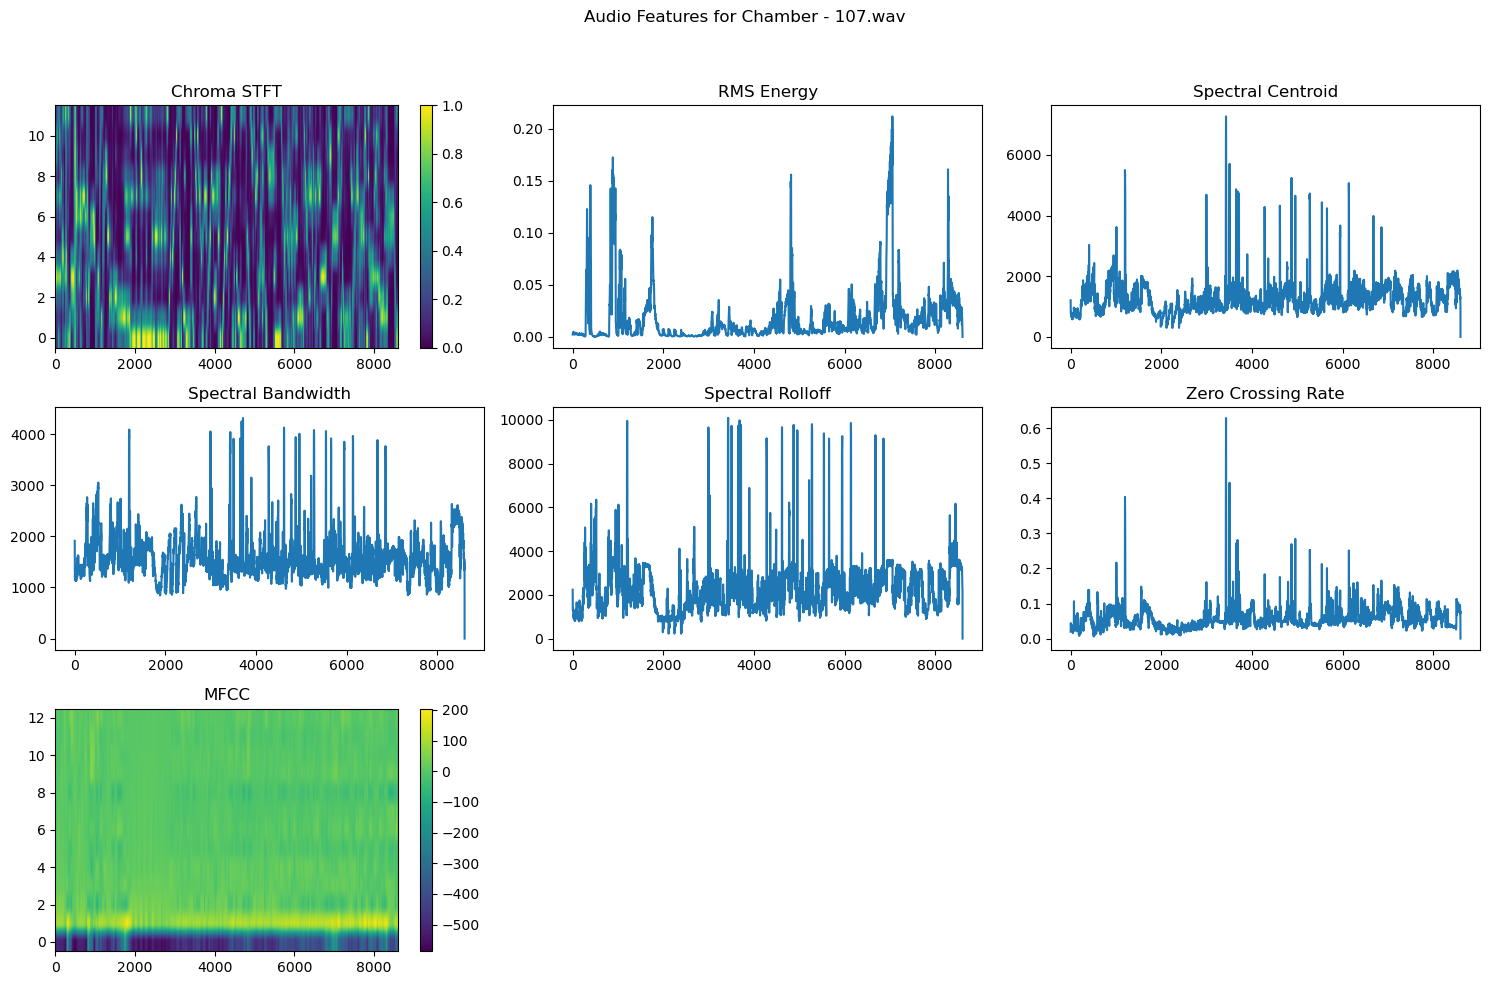

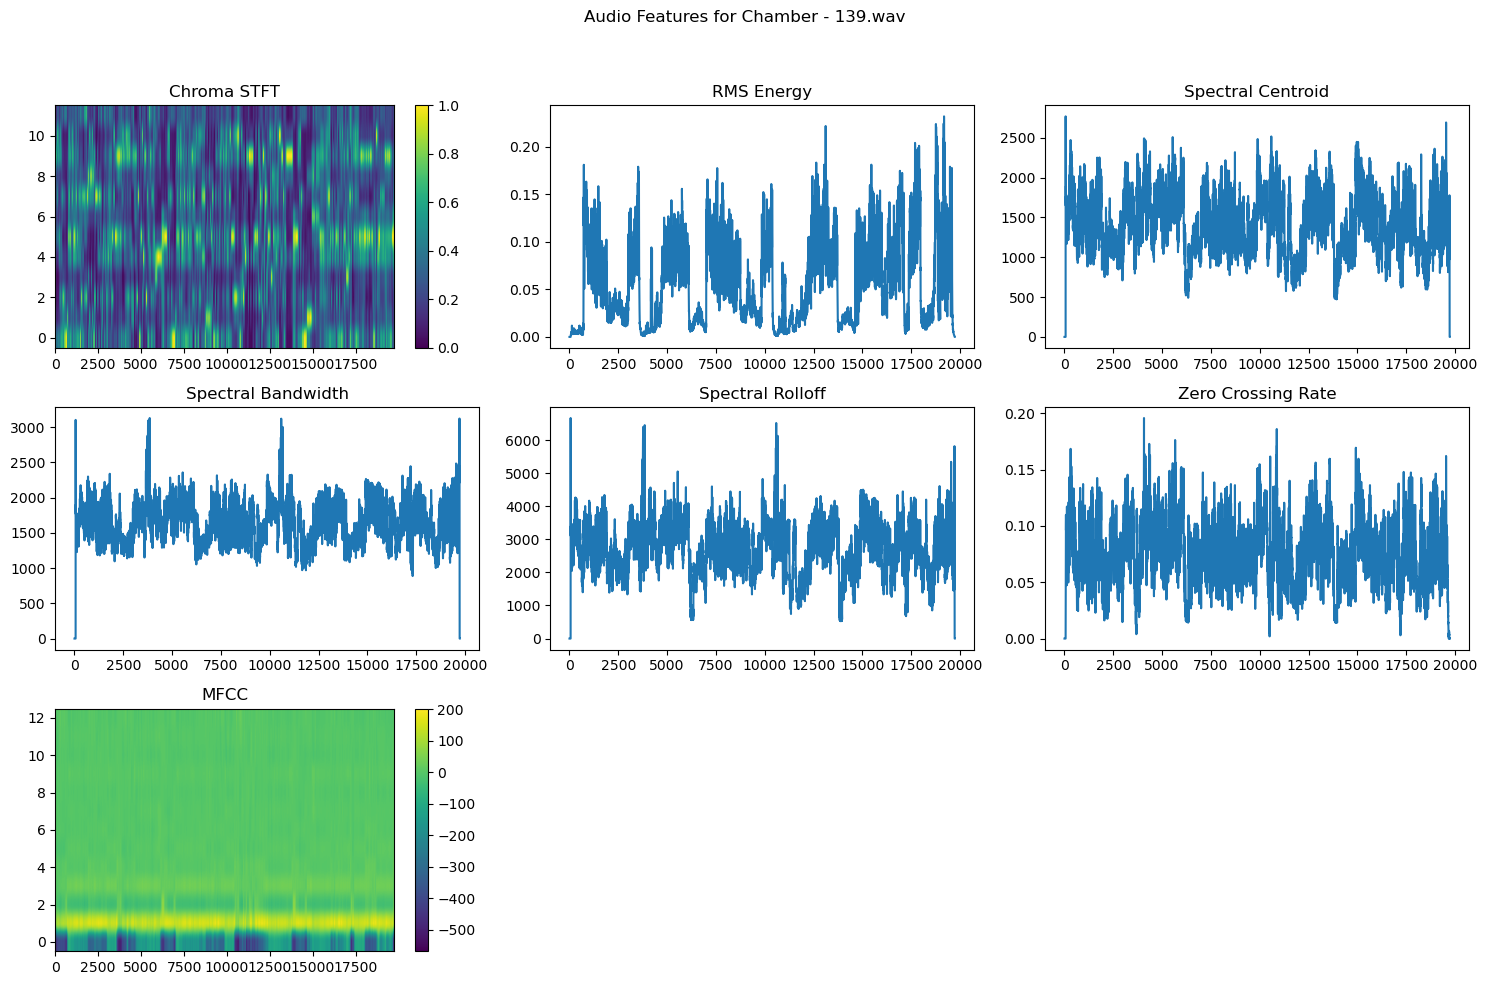

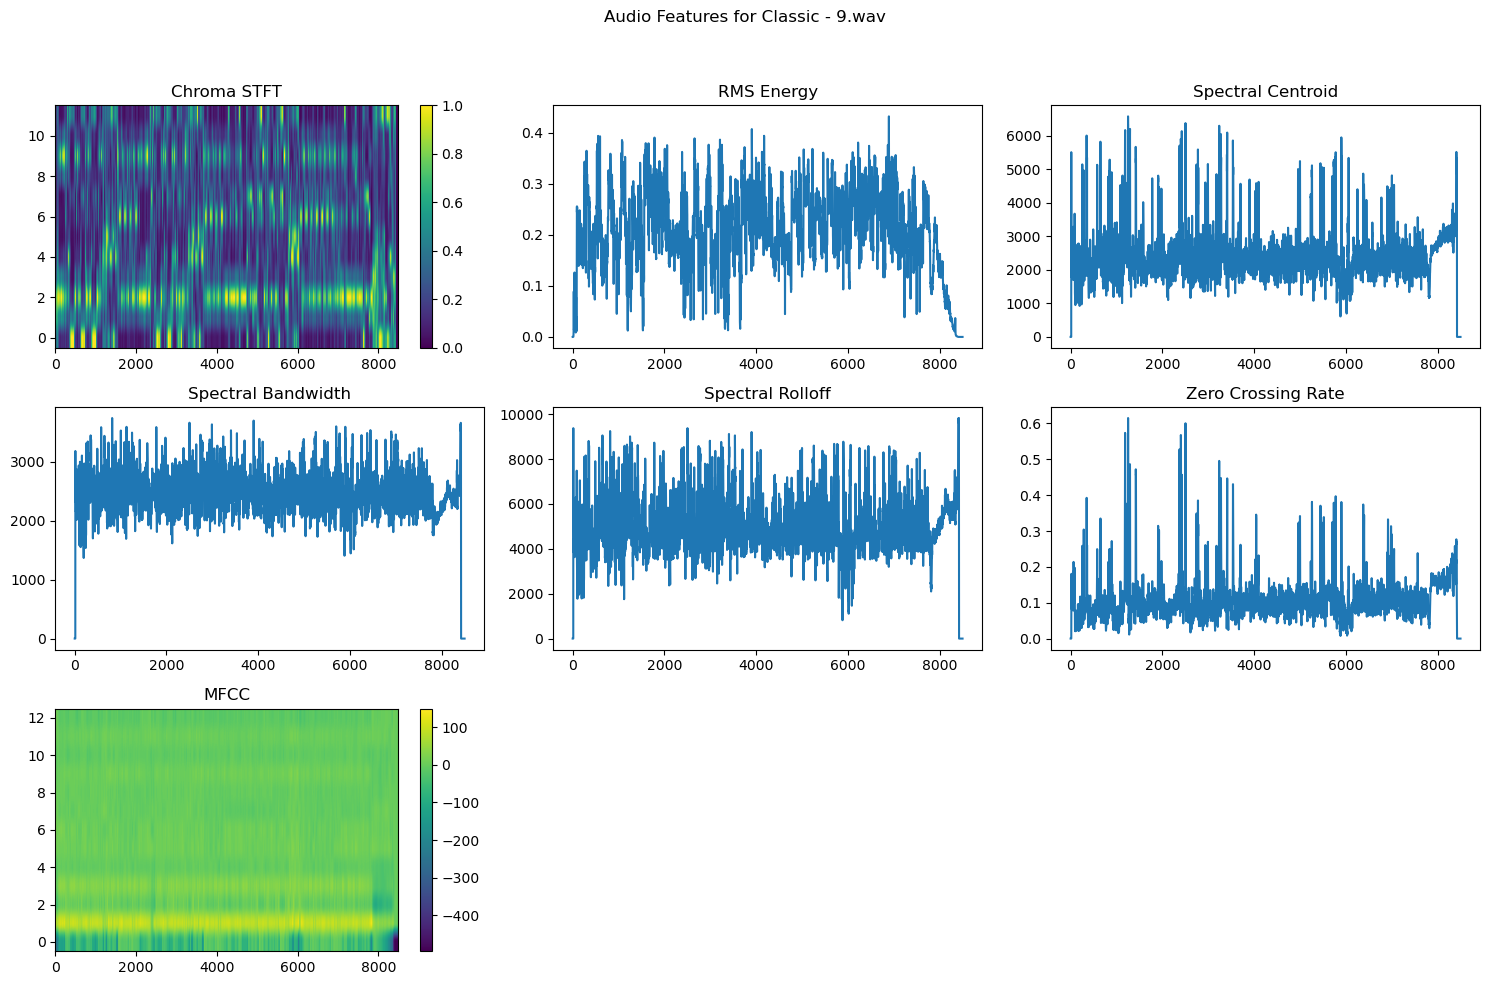

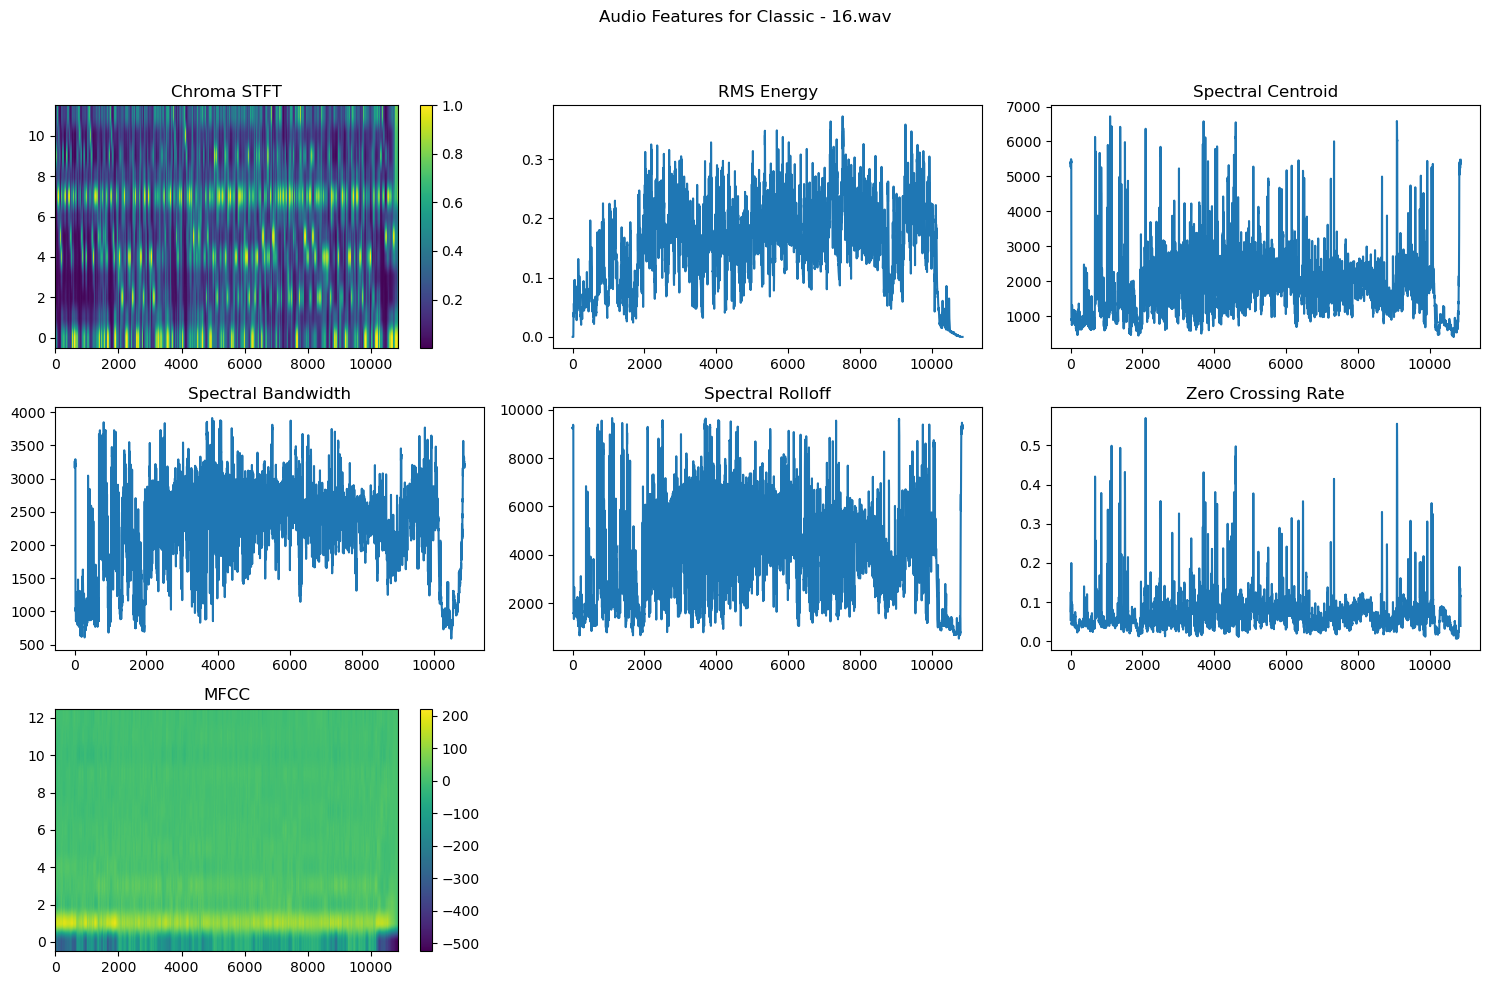

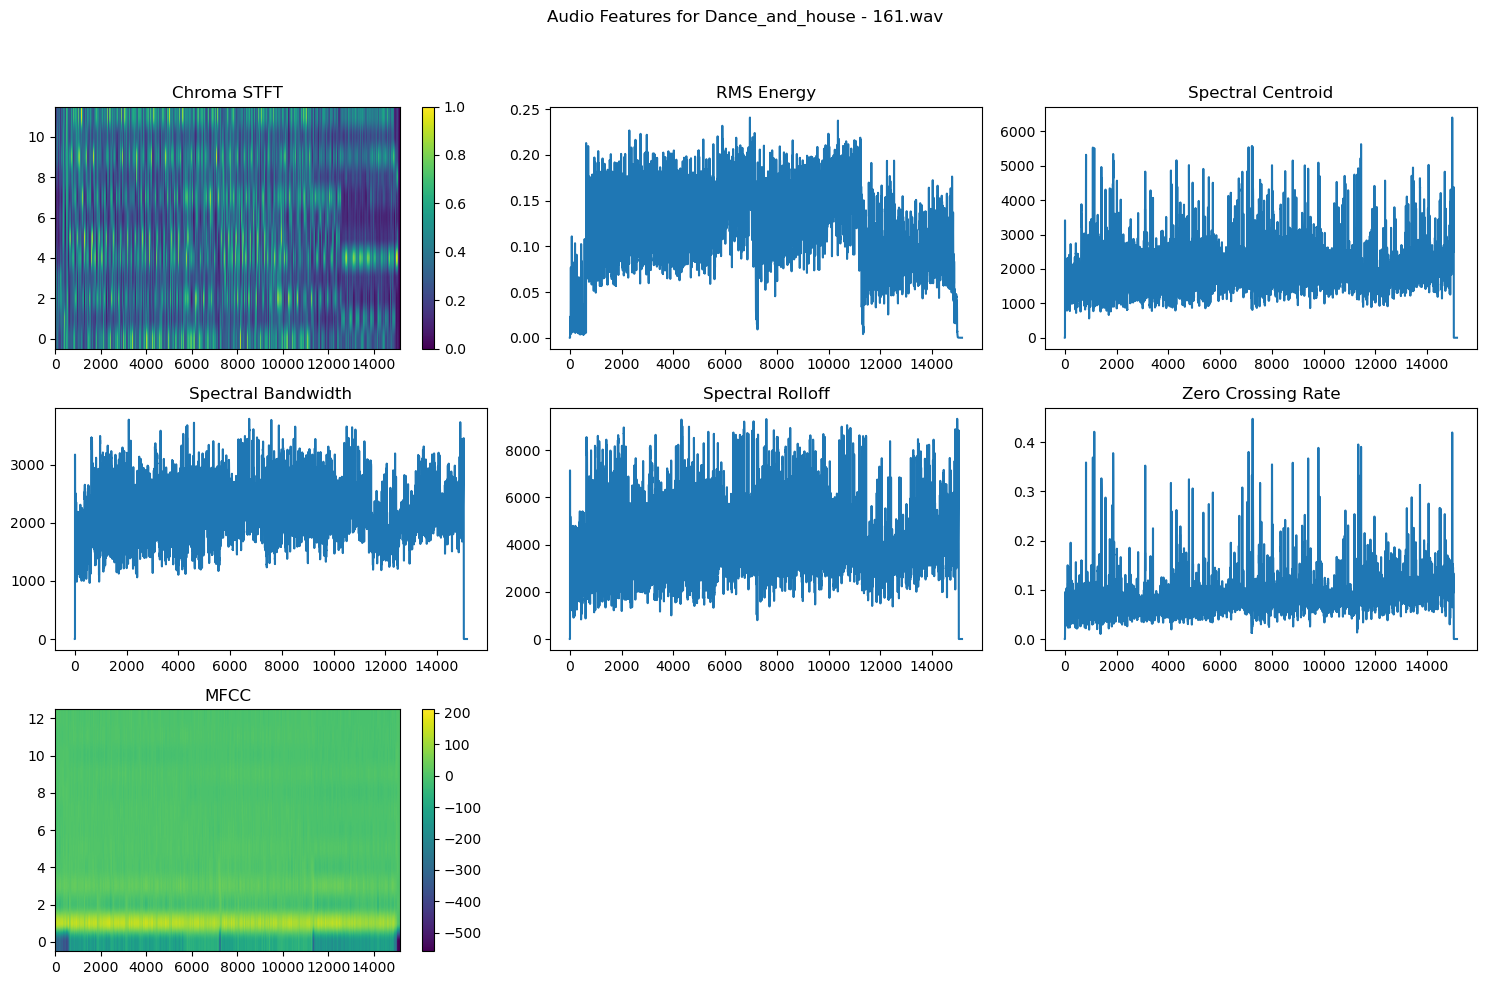

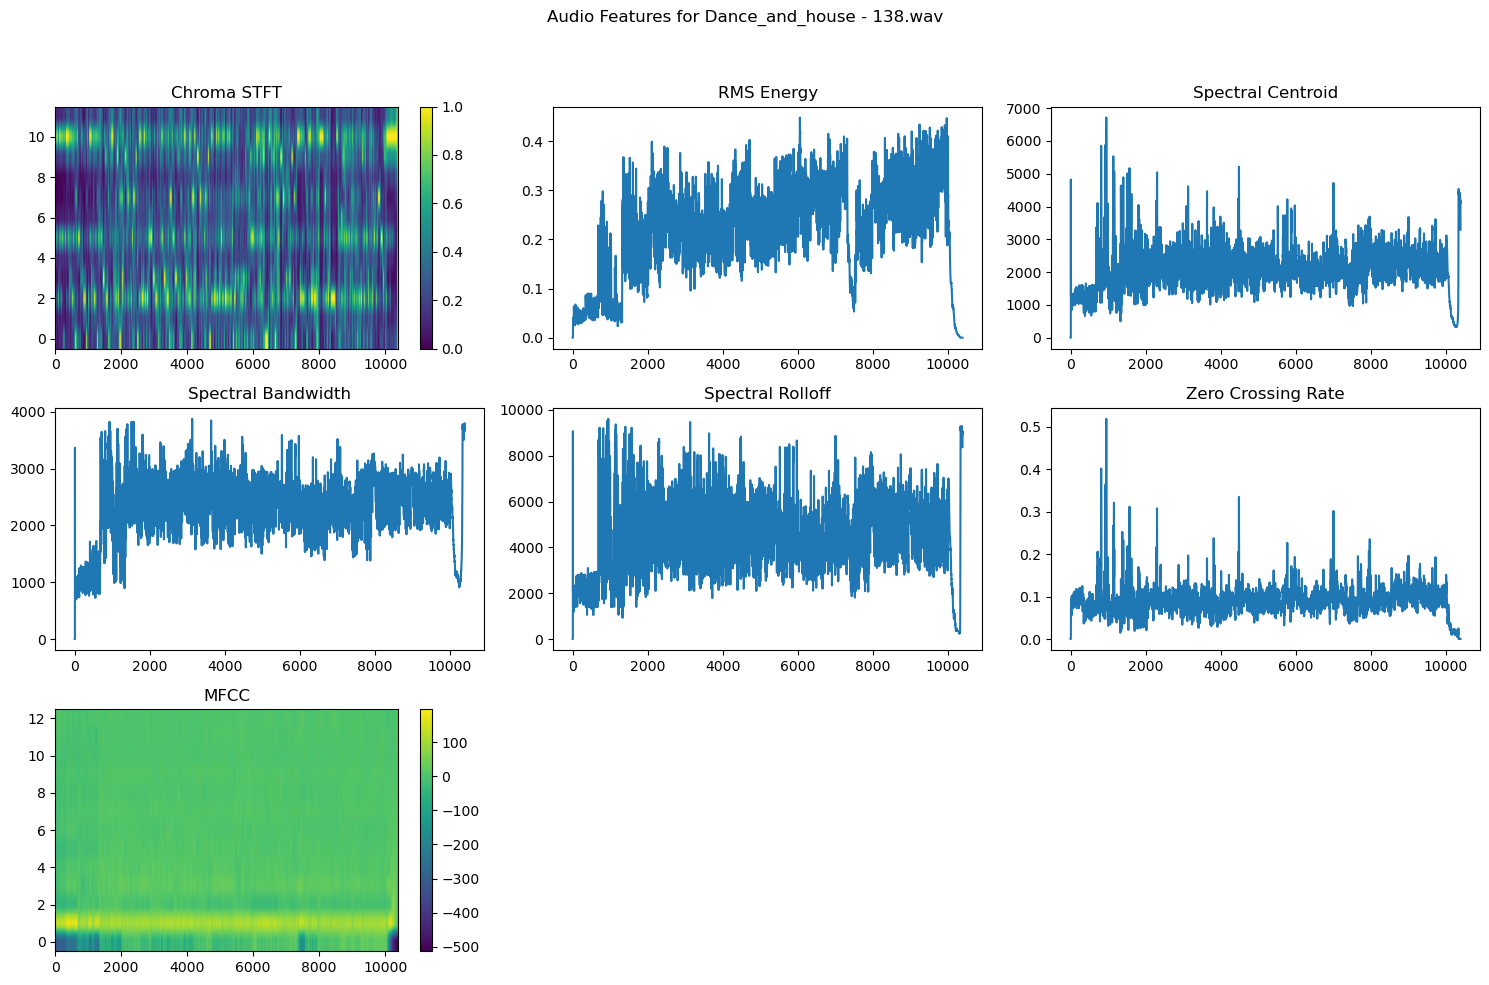

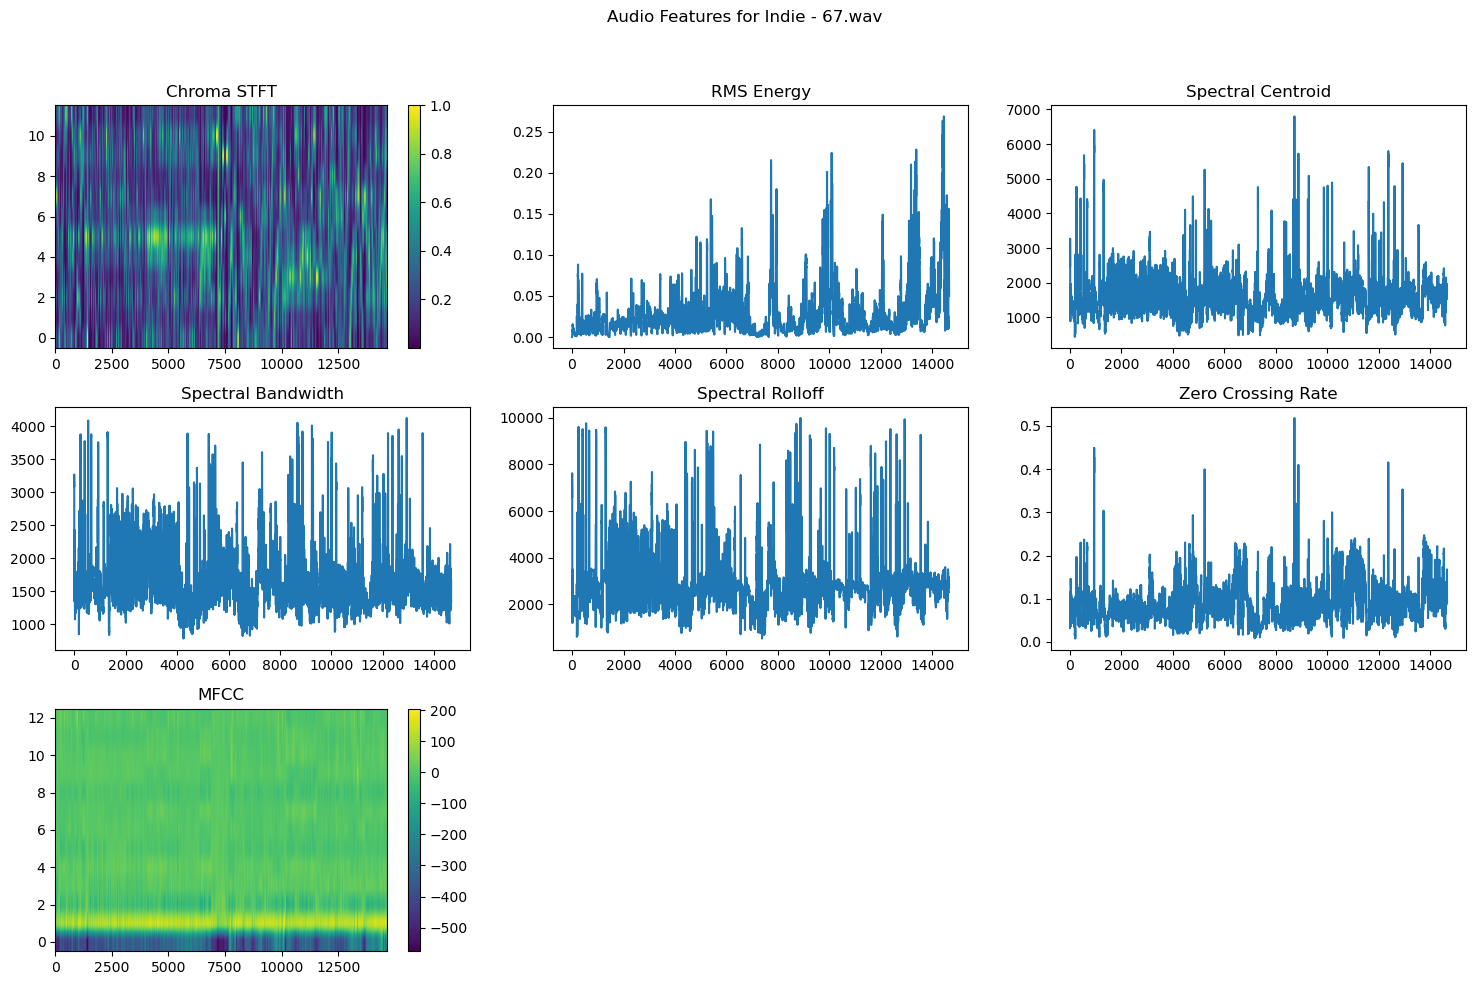

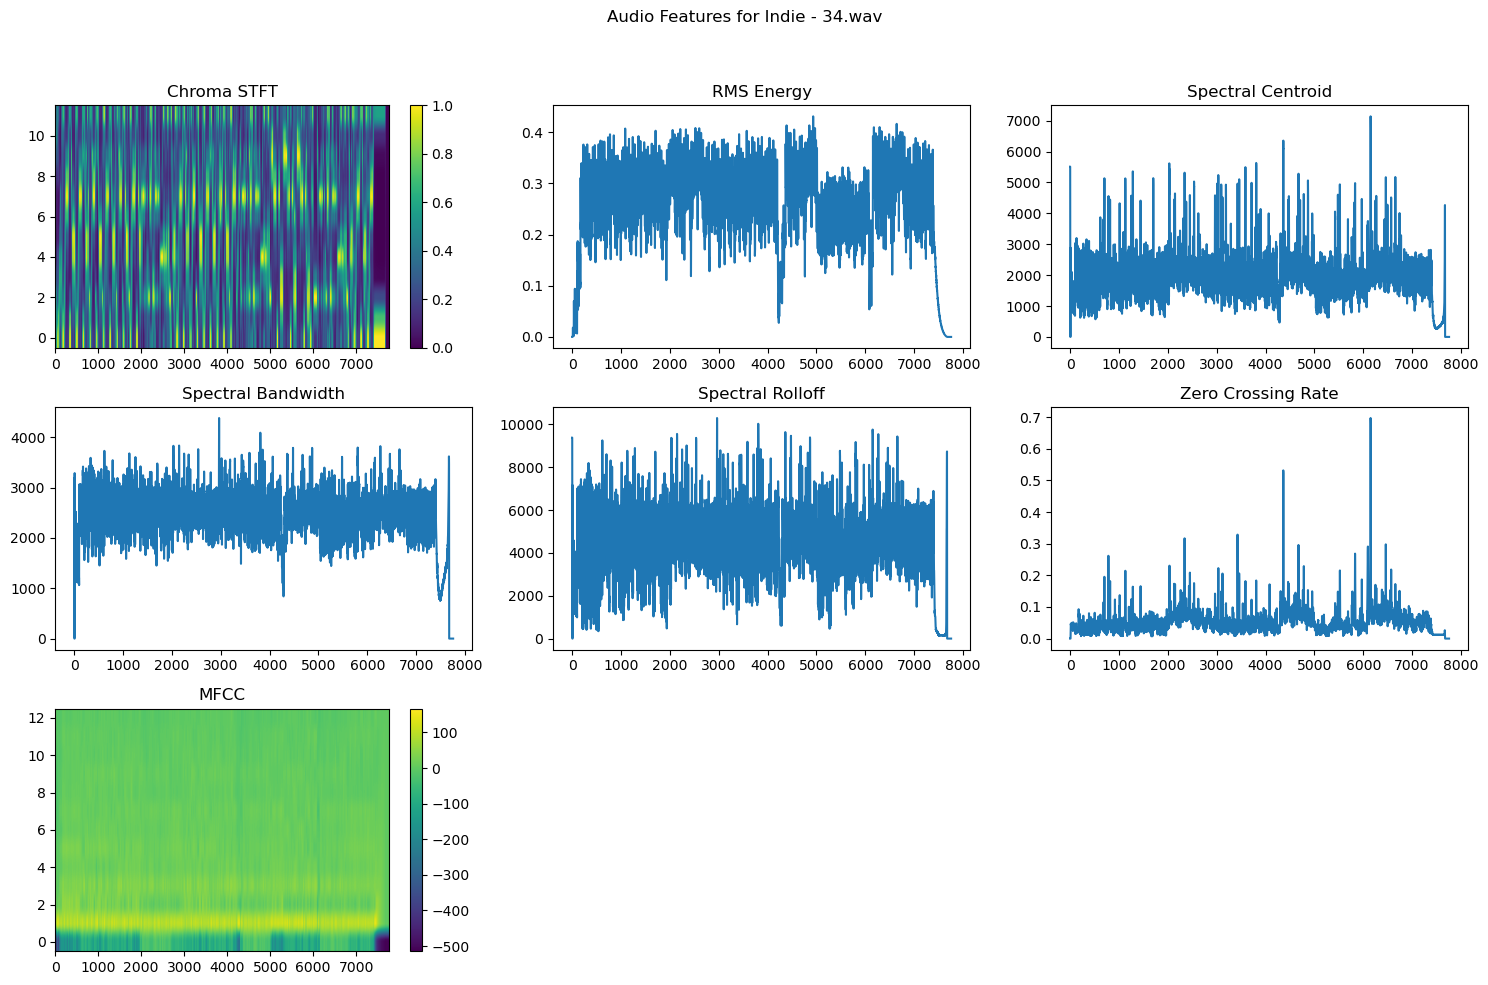

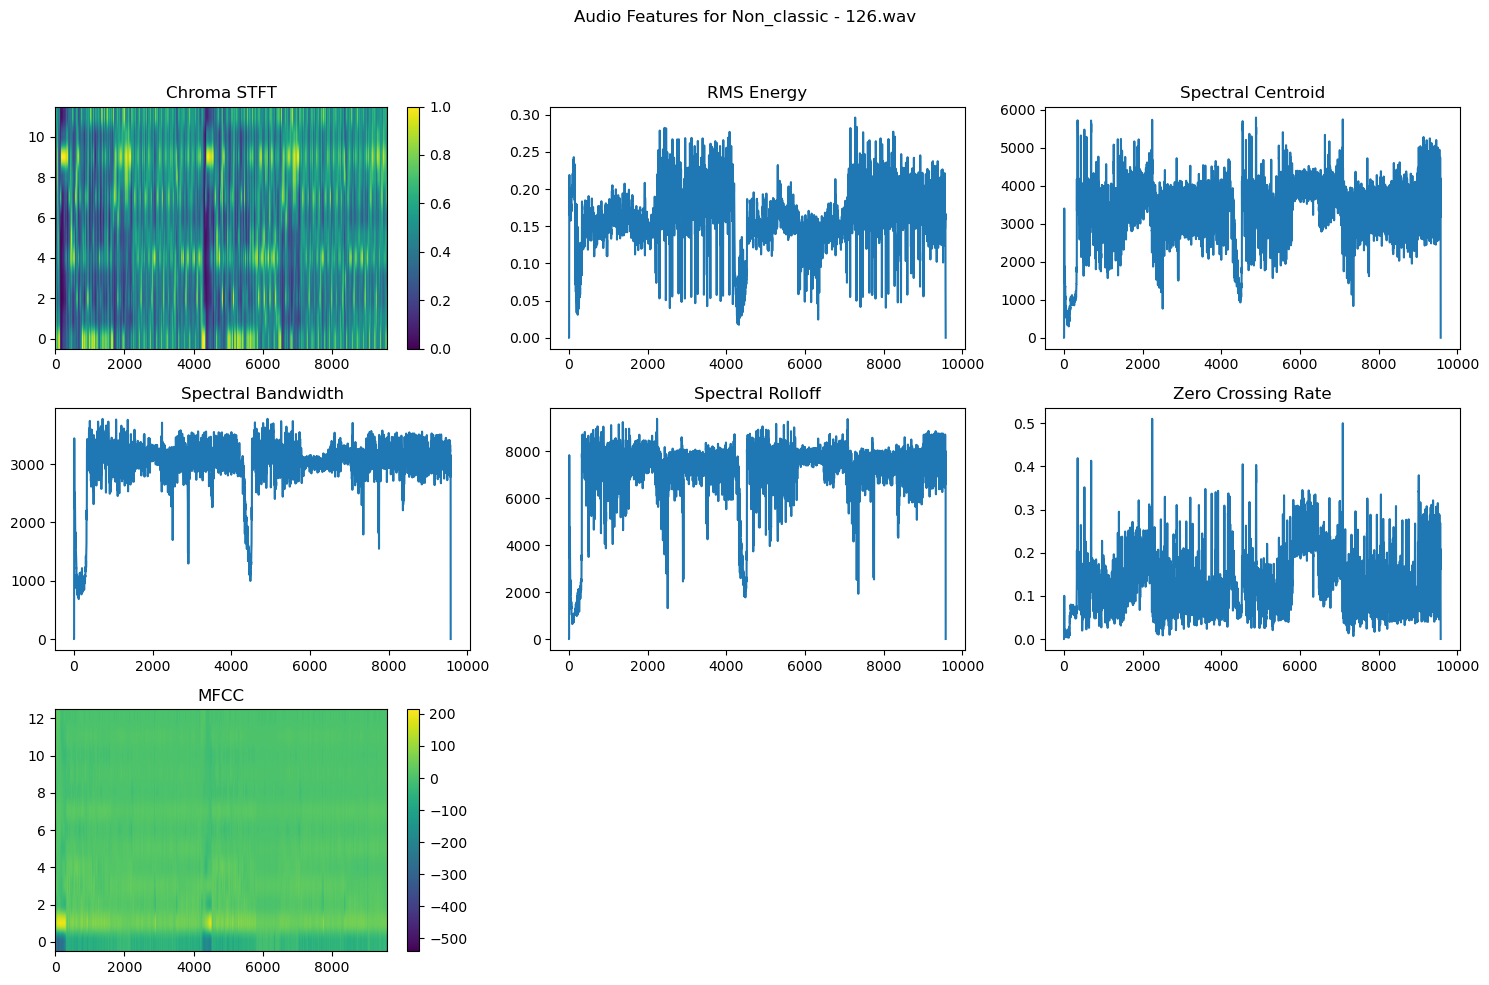

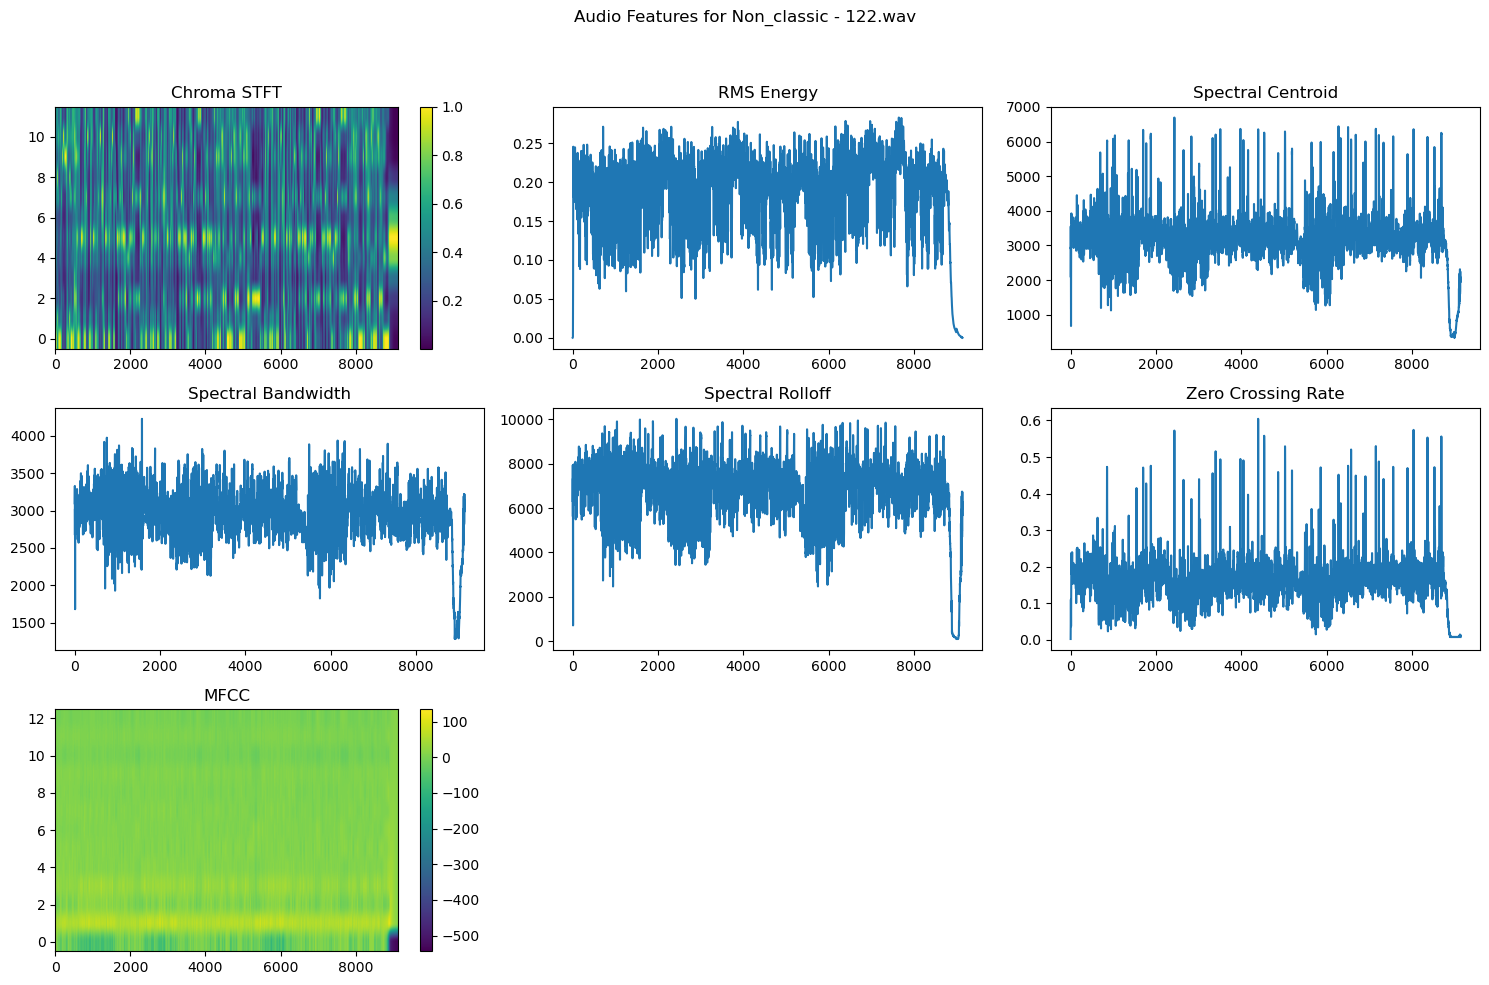

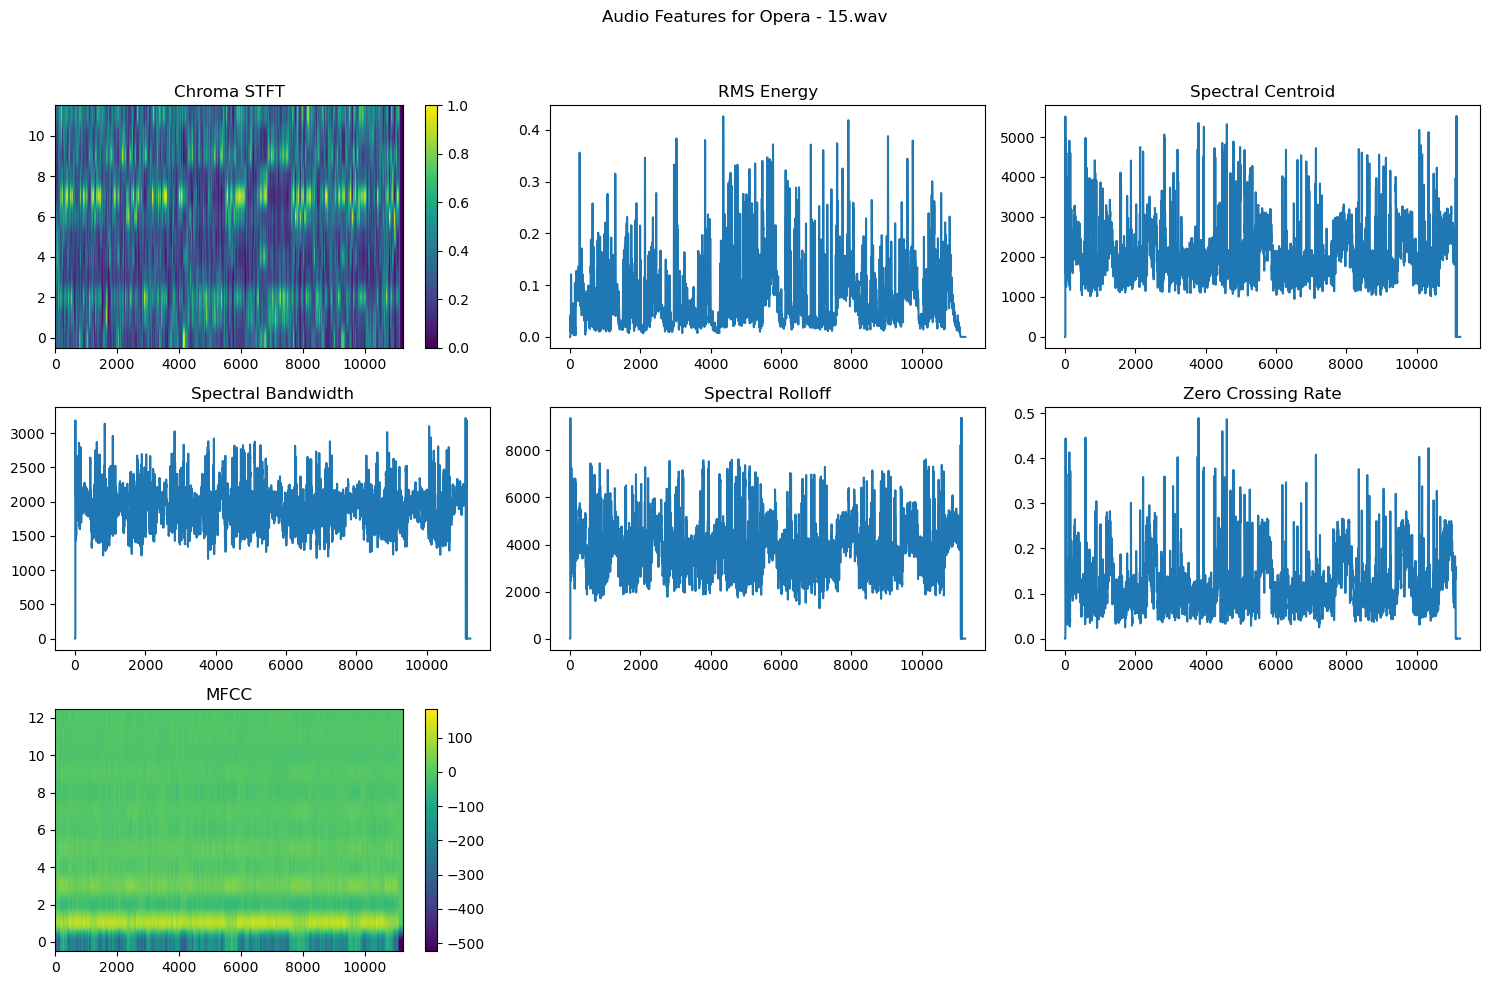

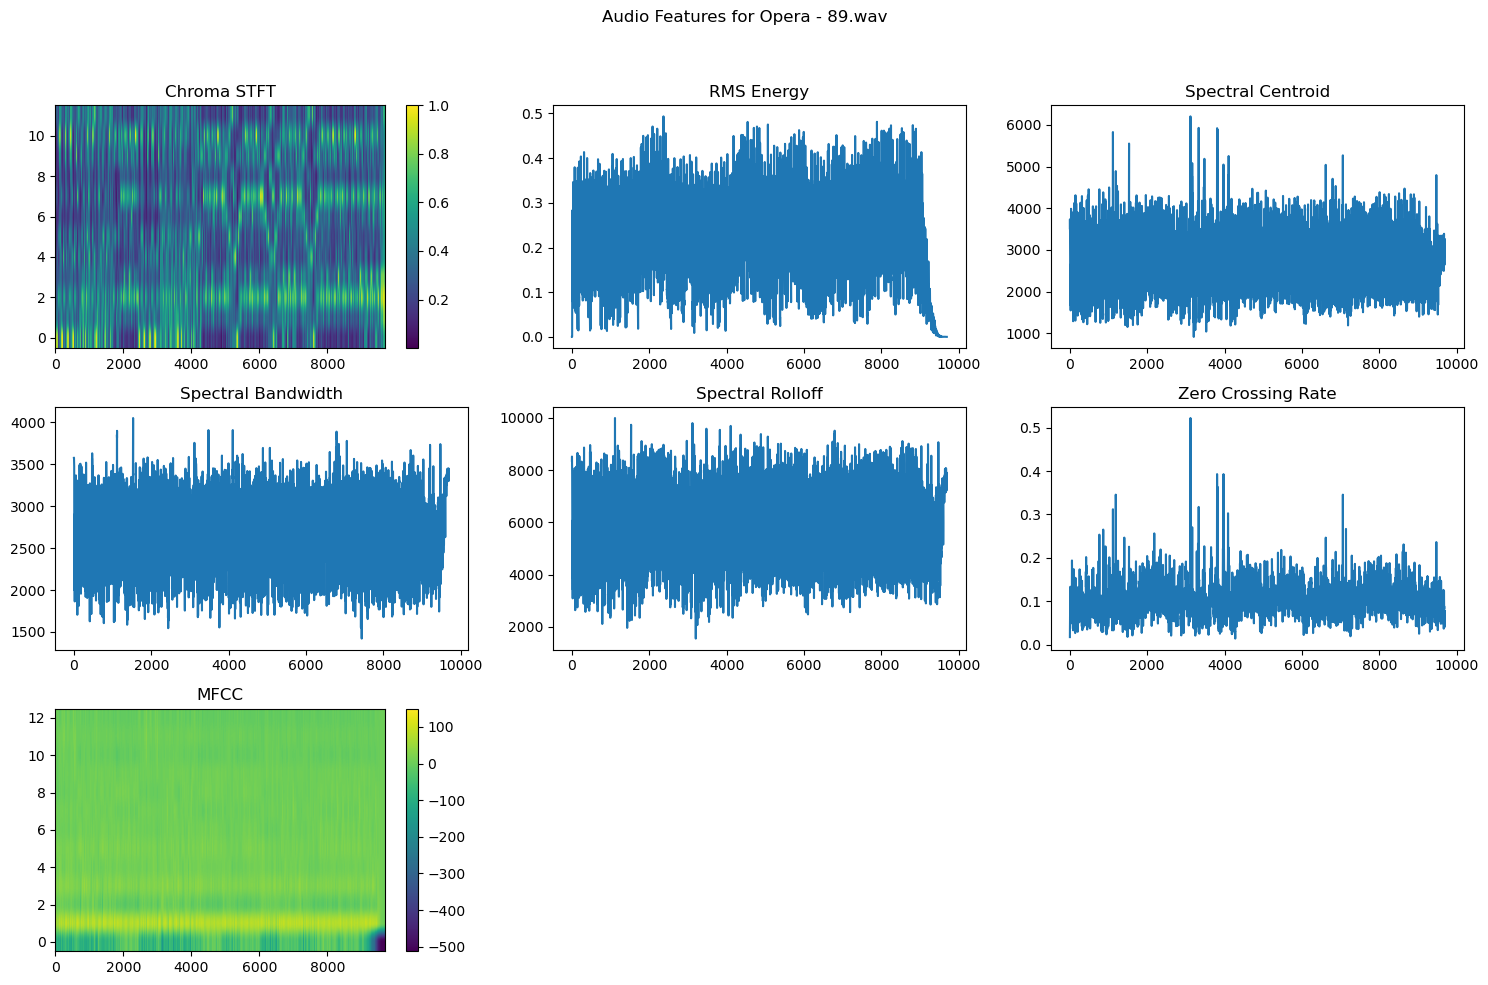

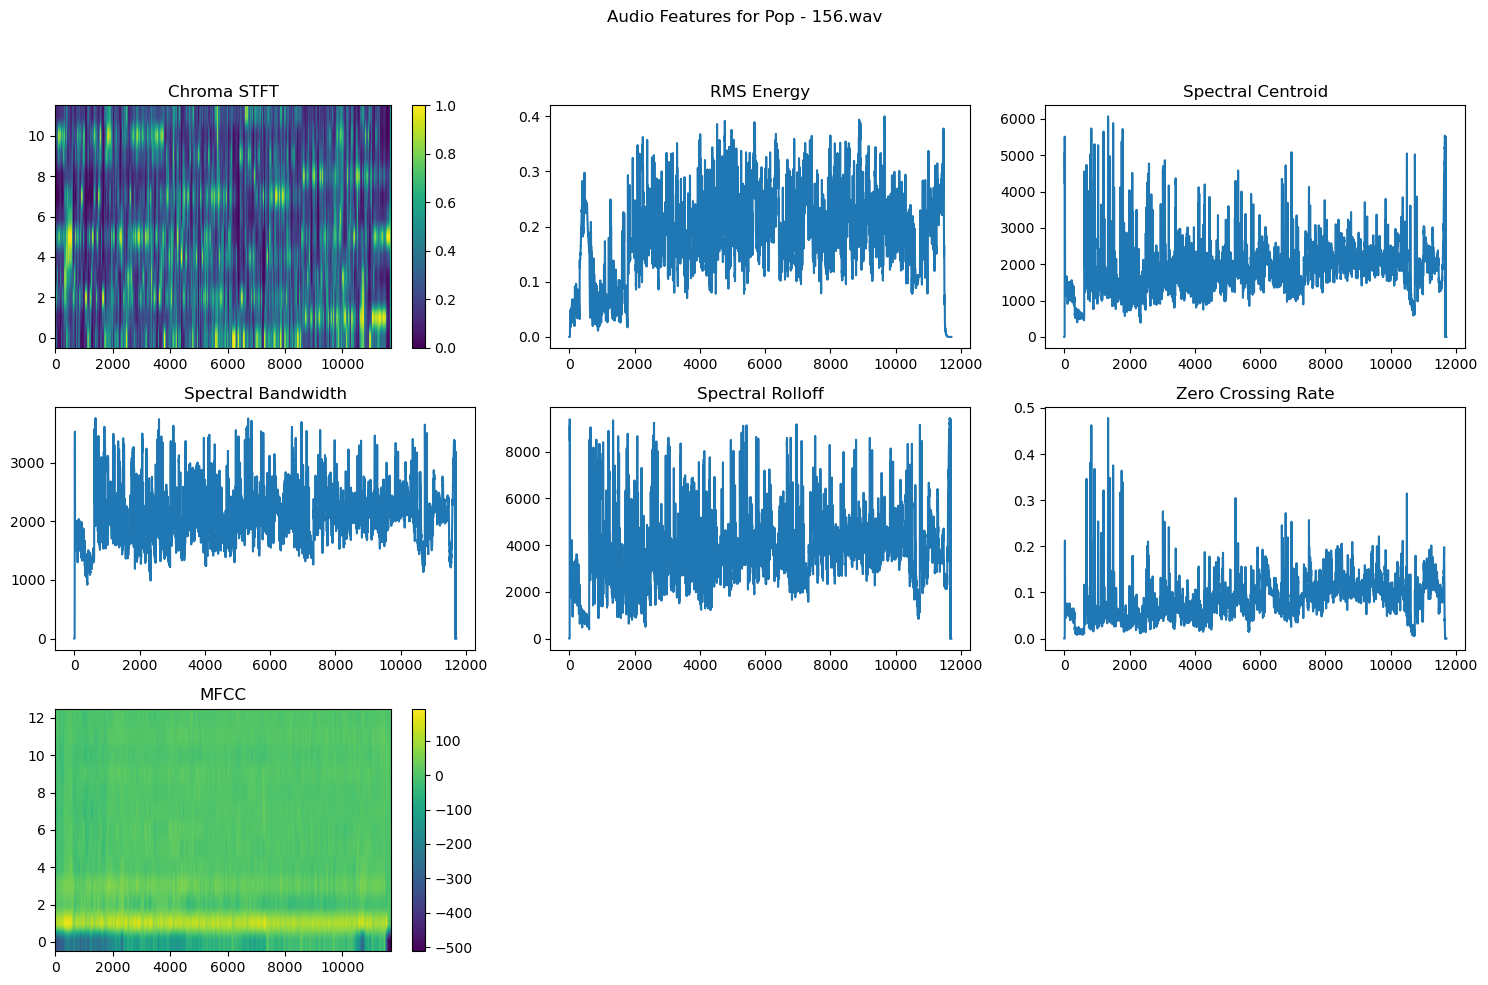

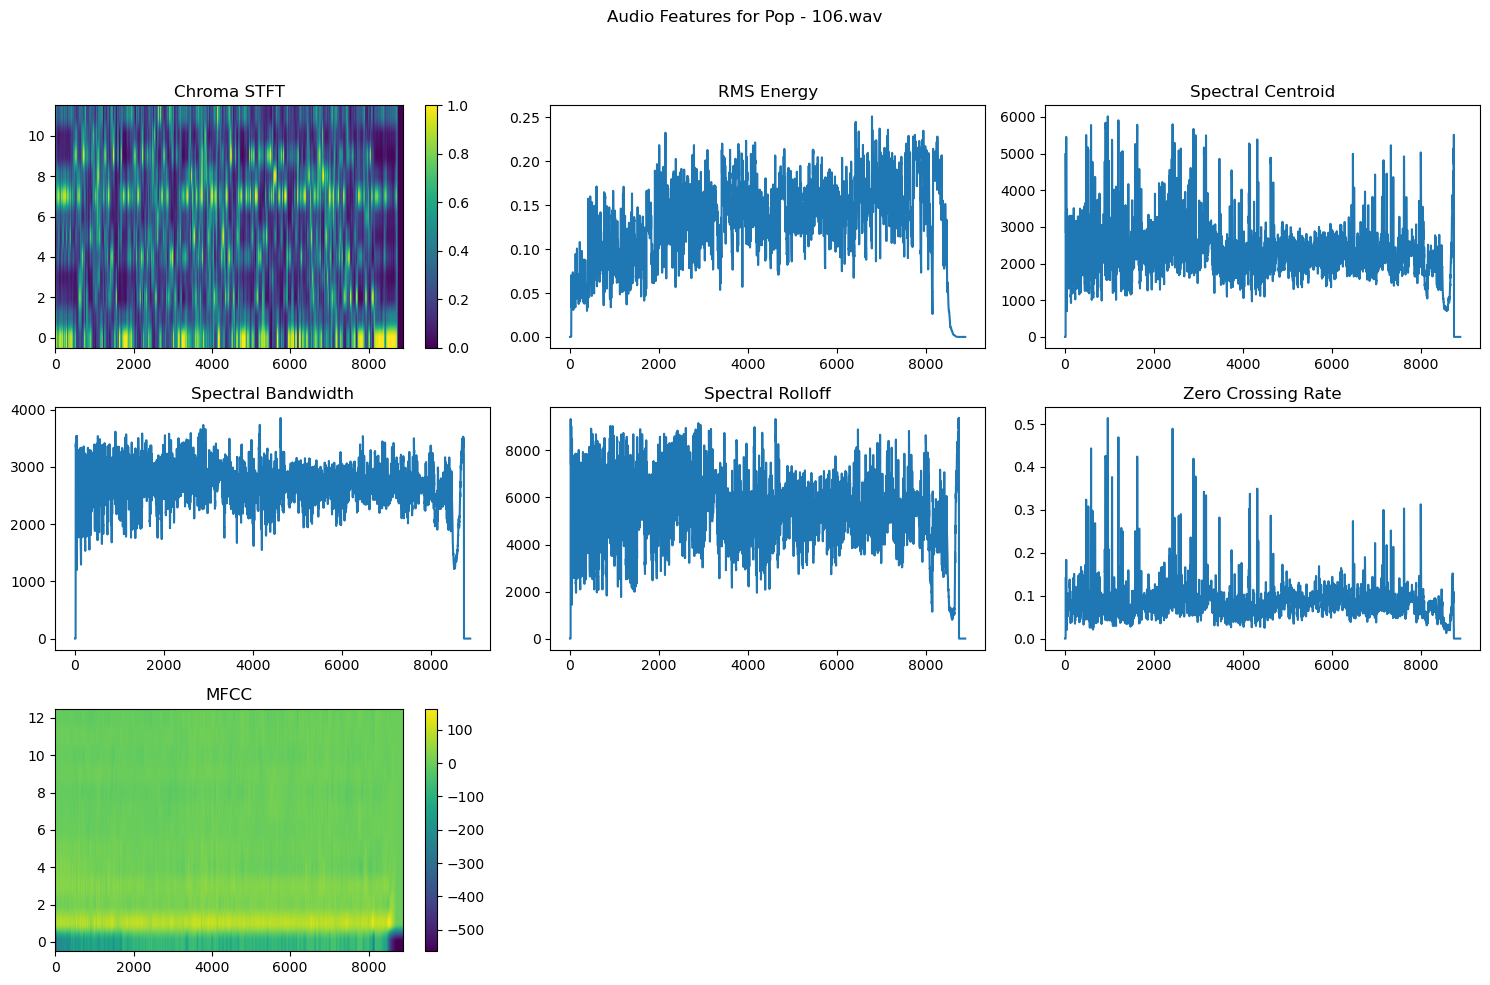

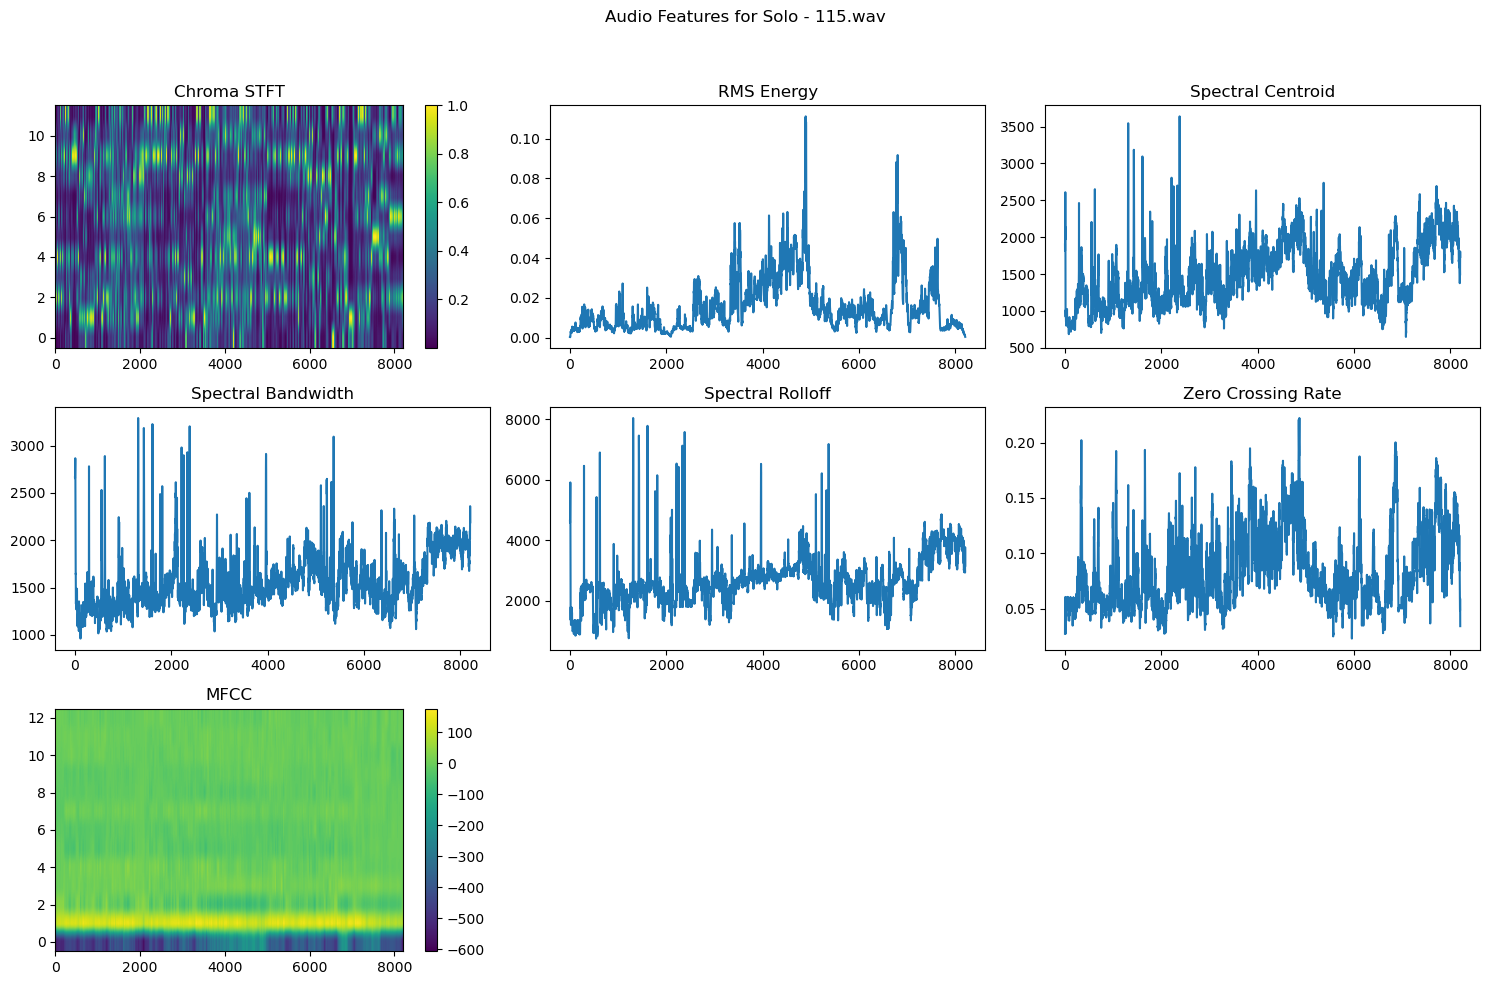

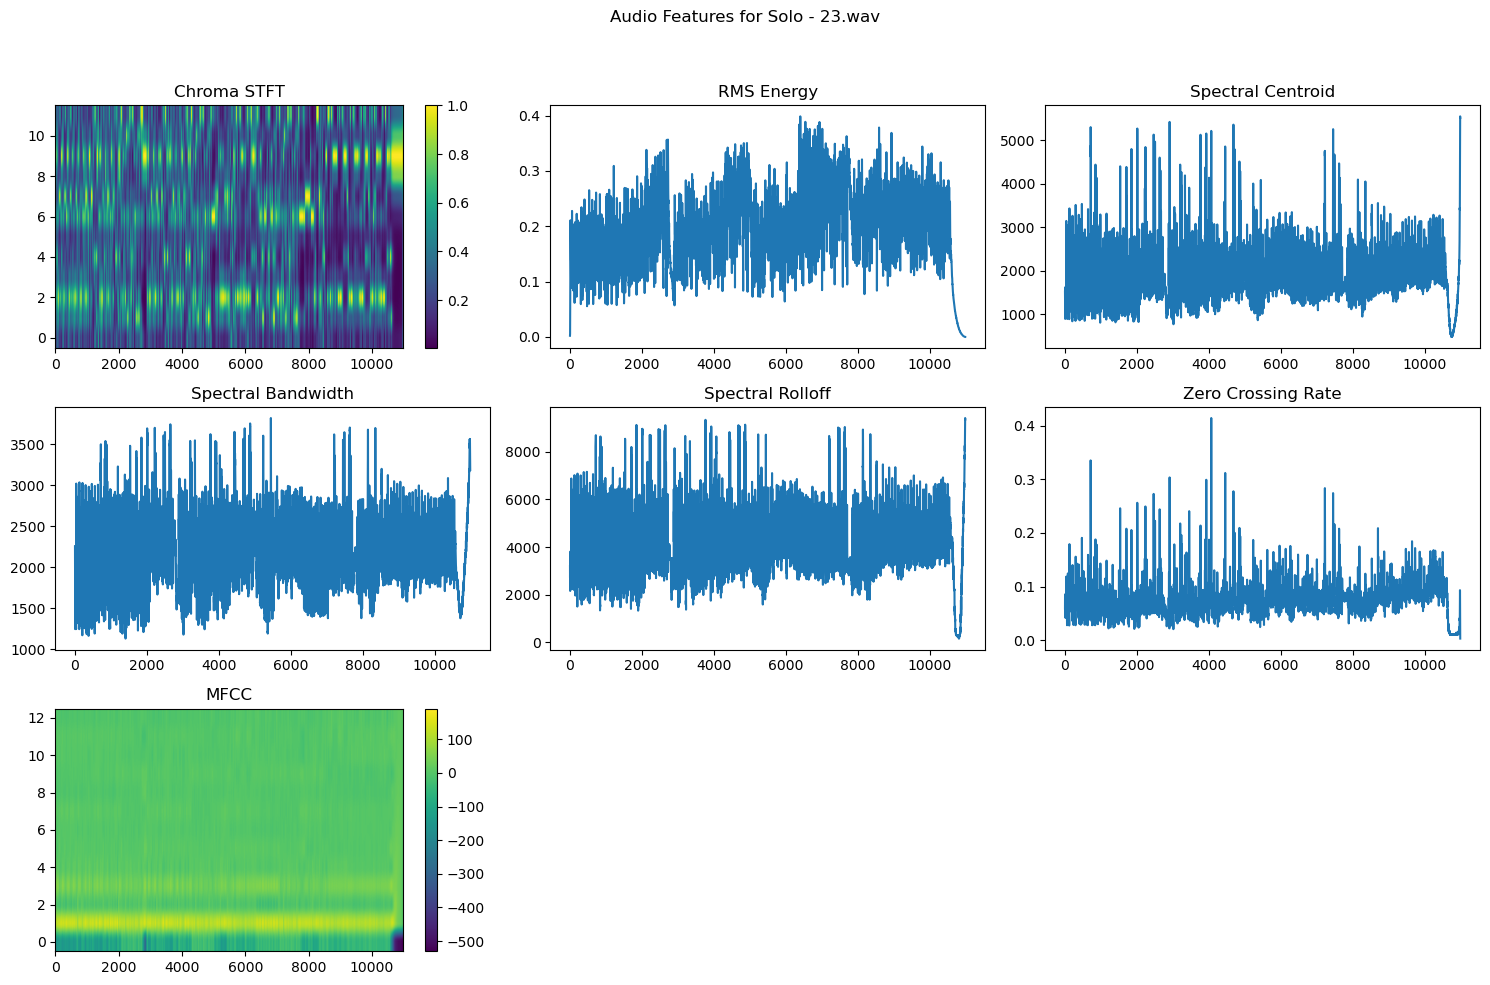

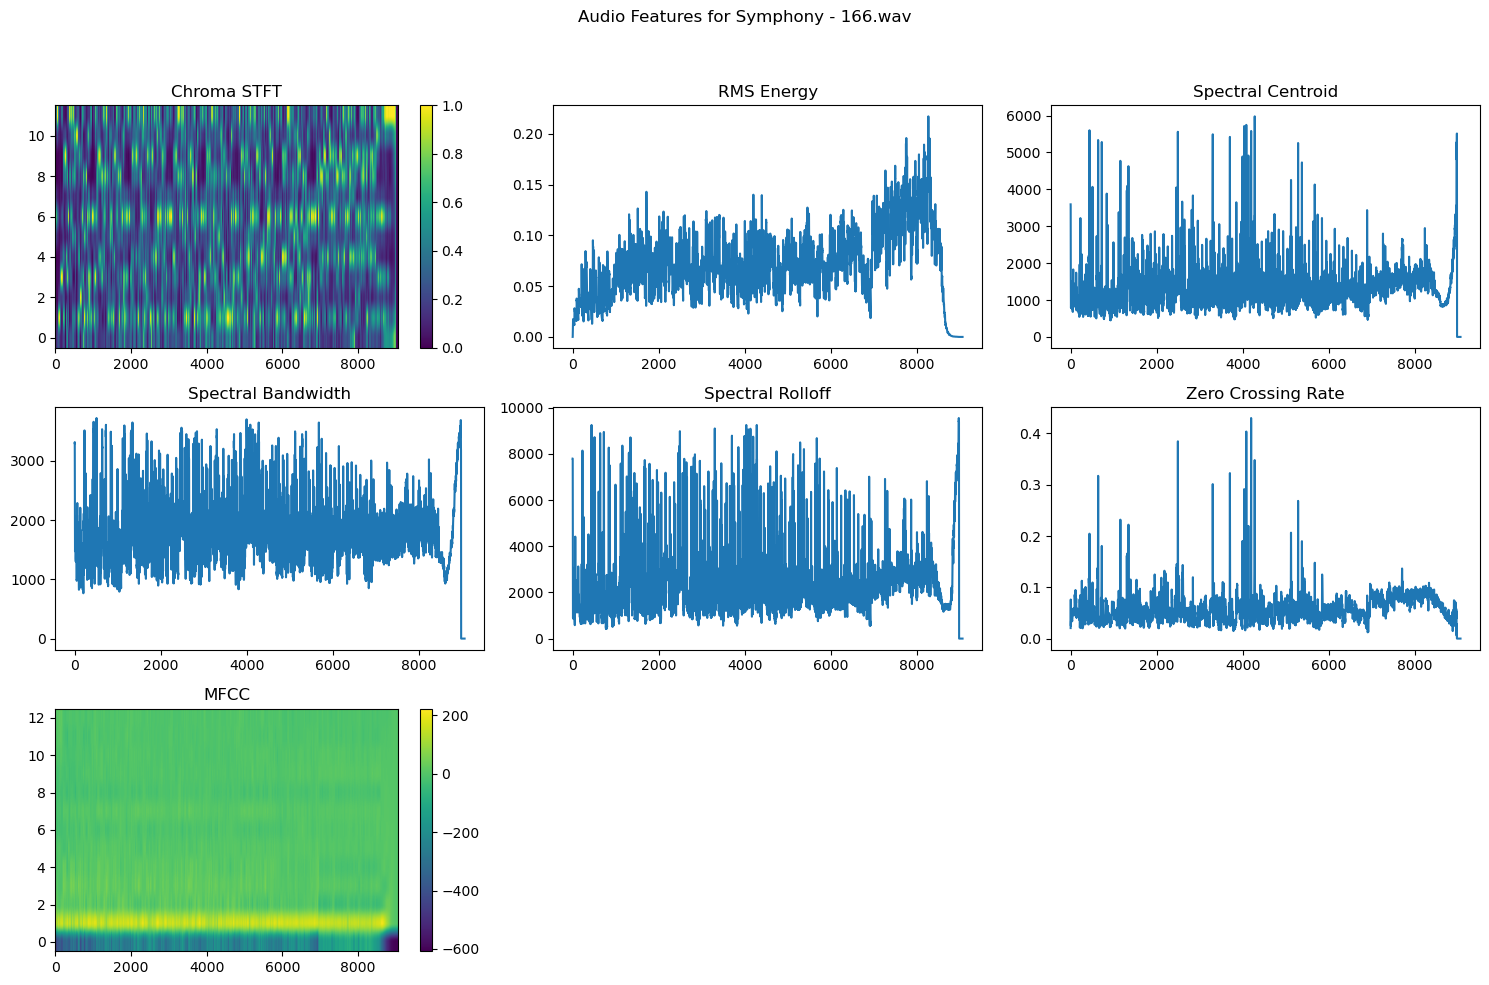

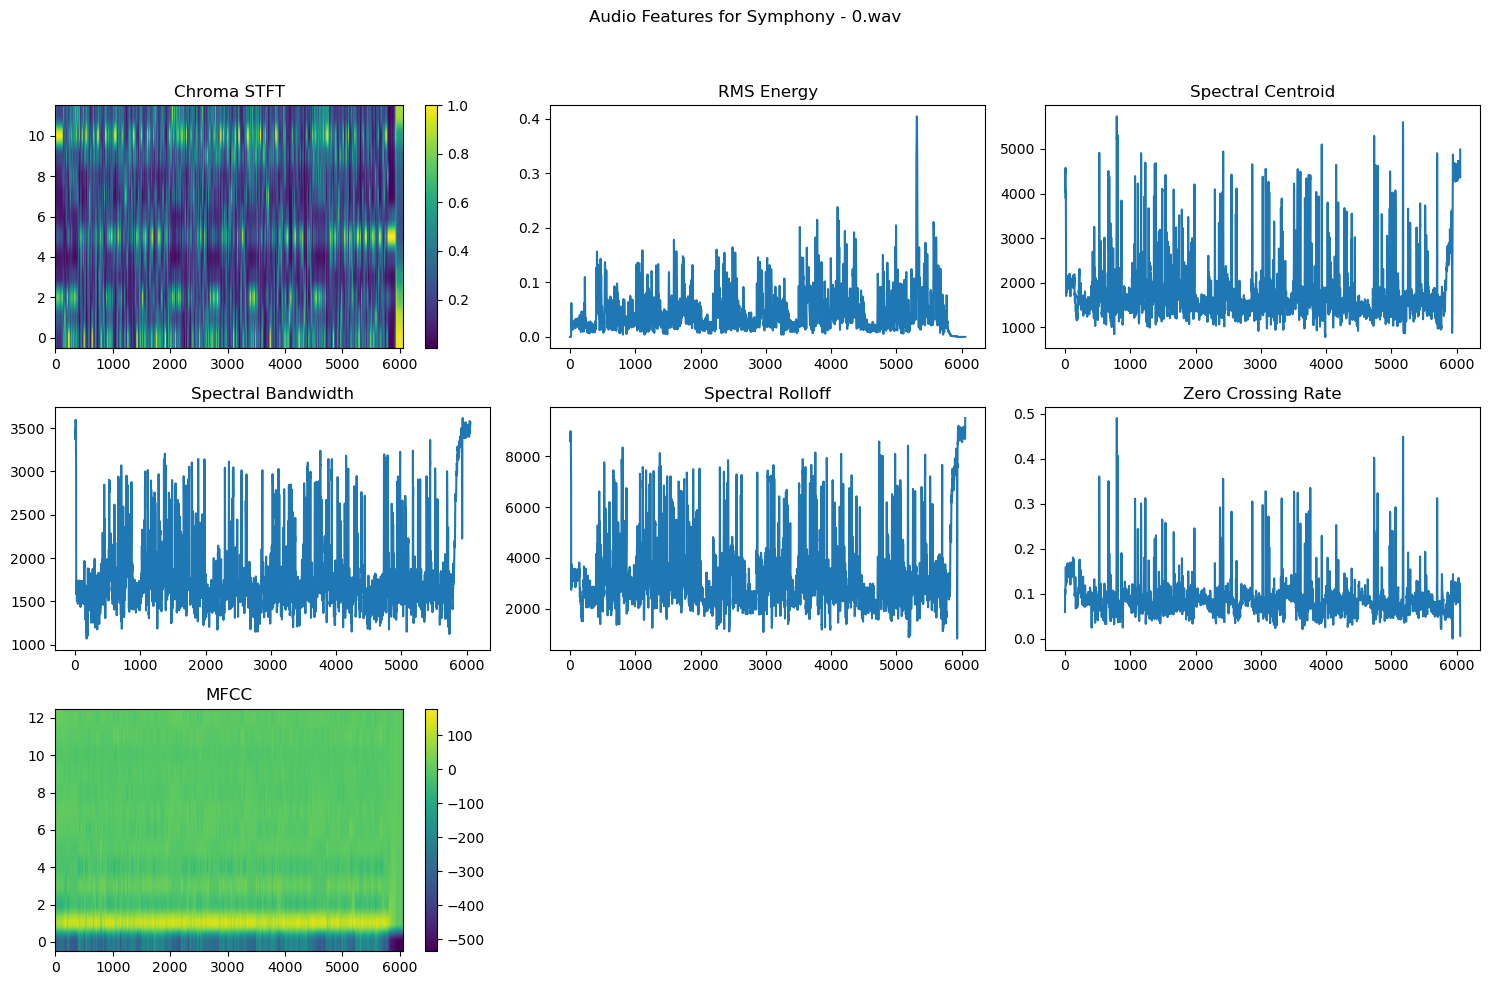

In [10]:
# Carga de datos de anotaciones y selección de dos audios por categoría
df = pd.read_csv('ccmusic2/validation/annotations.csv')
selected_files = df.groupby('label_name').apply(lambda x: x.sample(2)).reset_index(drop=True)

# Función para graficar las características del audio
def plot_audio_features(audio_path, sr, label):
    audio_data, sr = librosa.load(audio_path, sr=sr)

    # Extracción de características
    chroma_stft = librosa.feature.chroma_stft(y=audio_data, sr=sr)
    rms = librosa.feature.rms(y=audio_data)
    spec_cent = librosa.feature.spectral_centroid(y=audio_data, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=audio_data, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=audio_data)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)

    # Visualización de características
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Audio Features for {label} - {os.path.basename(audio_path)}')

    plt.subplot(3, 3, 1)
    plt.imshow(chroma_stft, aspect='auto', origin='lower')
    plt.title('Chroma STFT')
    plt.colorbar()

    plt.subplot(3, 3, 2)
    plt.plot(rms[0])
    plt.title('RMS Energy')

    plt.subplot(3, 3, 3)
    plt.plot(spec_cent[0])
    plt.title('Spectral Centroid')

    plt.subplot(3, 3, 4)
    plt.plot(spec_bw[0])
    plt.title('Spectral Bandwidth')

    plt.subplot(3, 3, 5)
    plt.plot(rolloff[0])
    plt.title('Spectral Rolloff')

    plt.subplot(3, 3, 6)
    plt.plot(zcr[0])
    plt.title('Zero Crossing Rate')

    plt.subplot(3, 3, 7)
    plt.imshow(mfcc, aspect='auto', origin='lower')
    plt.title('MFCC')
    plt.colorbar()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Procesamiento de los archivos seleccionados
for index, row in selected_files.iterrows():
    file_name = f'ccmusic2/train/audios/{row["audio_file"]}.wav'
    label = row['label_name']
    sample_rate = None  # Cargar con la tasa de muestreo original
    plot_audio_features(file_name, sample_rate, label)